In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_palette("Set2")
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("customer_shopping_data.csv")
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
df.head()


Saving customer_shopping_data.csv to customer_shopping_data.csv
Shape: (99457, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
print("Missing values per column:\n", df.isnull().sum())
df = df.drop_duplicates()
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['revenue'] = df['quantity'] * df['price']
print("\nAfter cleaning:", df.shape)
df.head()


Missing values per column:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

After cleaning: (99457, 11)


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


In [ ]:

print(df.describe(include="all"))
print("\nGender distribution:\n", df['gender'].value_counts())
print("\nCategory distribution:\n", df['category'].value_counts())


       invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN         8           NaN   
top       I232867     C273973  Female           NaN  Clothing           NaN   
freq            1           1   59482           NaN     34487           NaN   
mean          NaN         NaN     NaN     43.427089       NaN      3.003429   
min           NaN         NaN     NaN     18.000000       NaN      1.000000   
25%           NaN         NaN     NaN     30.000000       NaN      2.000000   
50%           NaN         NaN     NaN     43.000000       NaN      3.000000   
75%           NaN         NaN     NaN     56.000000       NaN      4.000000   
max           NaN         NaN     NaN     69.000000       NaN      5.000000   
std           NaN         NaN     NaN     14.990054       NaN      1.413025   

               price payment_method                

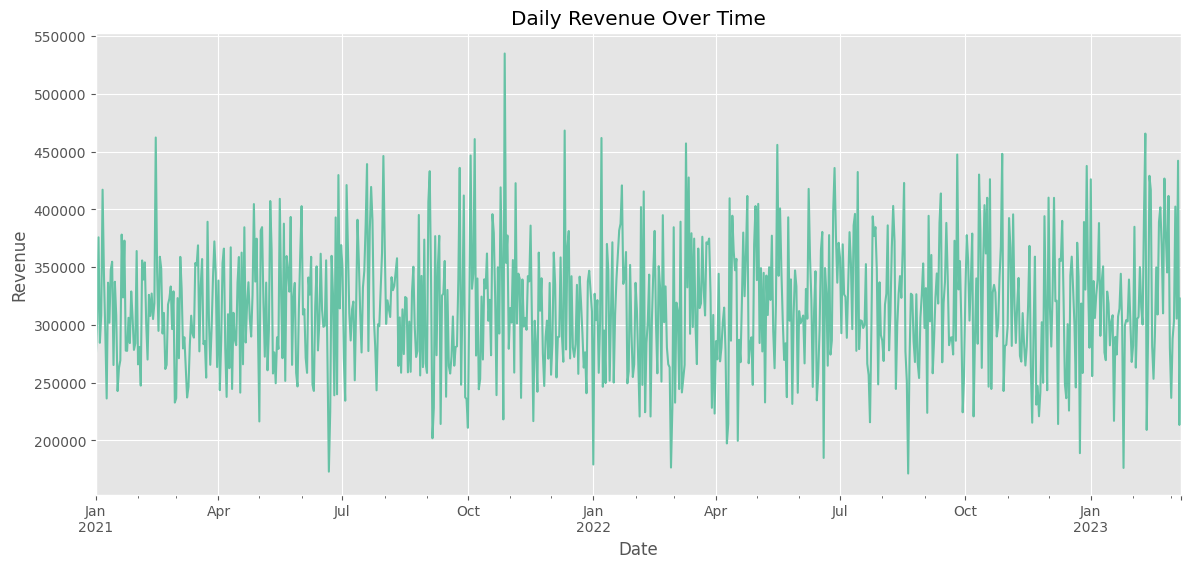

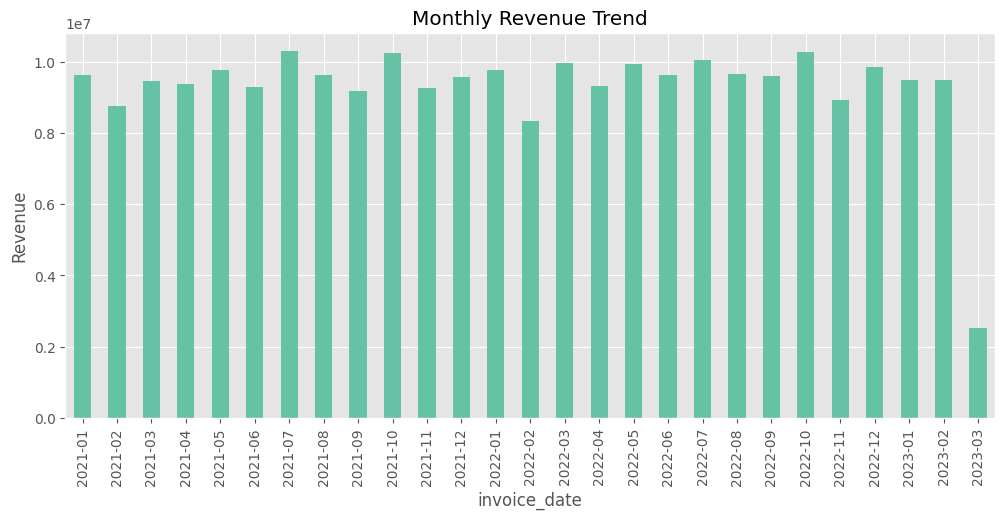

In [ ]:

daily_sales = df.groupby('invoice_date')['revenue'].sum()
plt.figure(figsize=(14,6))
daily_sales.plot()
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()
monthly_sales = df.groupby(df['invoice_date'].dt.to_period('M'))['revenue'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


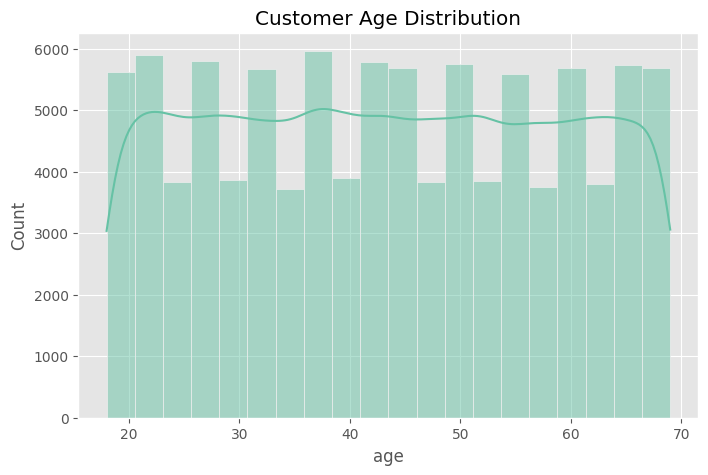

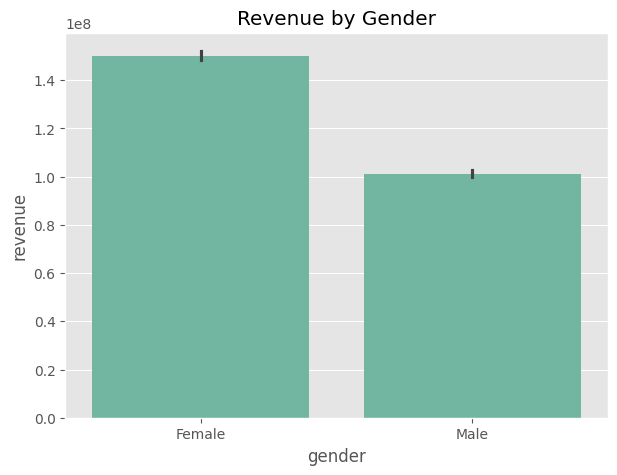

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()
plt.figure(figsize=(7,5))
sns.barplot(x="gender", y="revenue", data=df, estimator=sum)
plt.title("Revenue by Gender")
plt.show()


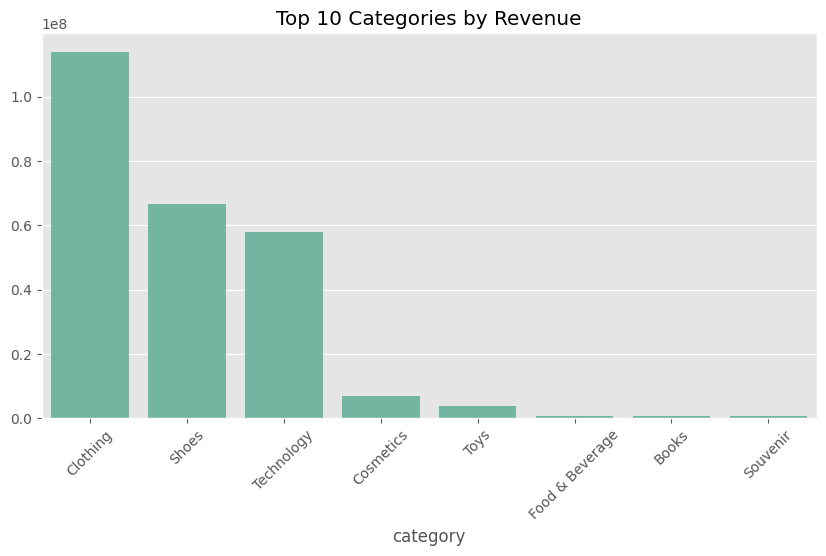

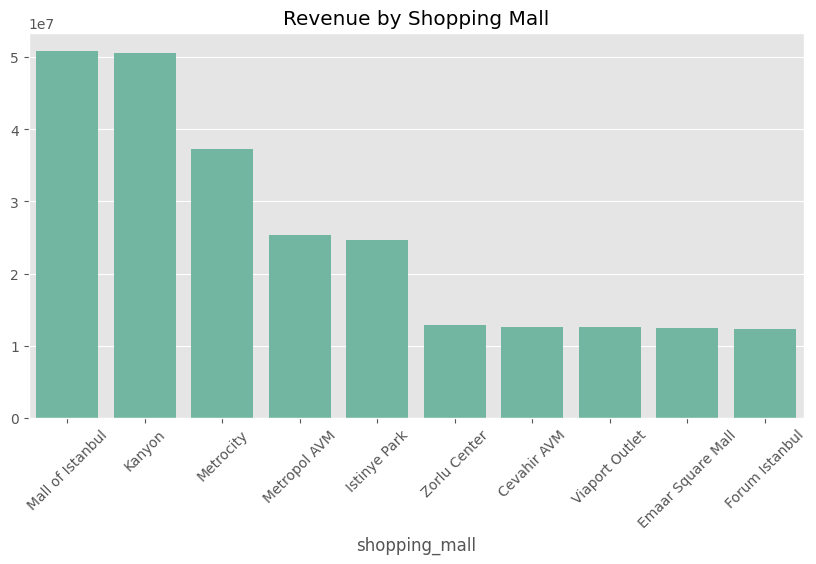

In [ ]:

plt.figure(figsize=(10,5))
top_categories = df.groupby("category")['revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Revenue")
plt.show()
plt.figure(figsize=(10,5))
mall_sales = df.groupby("shopping_mall")['revenue'].sum().sort_values(ascending=False)
sns.barplot(x=mall_sales.index, y=mall_sales.values)
plt.xticks(rotation=45)
plt.title("Revenue by Shopping Mall")
plt.show()


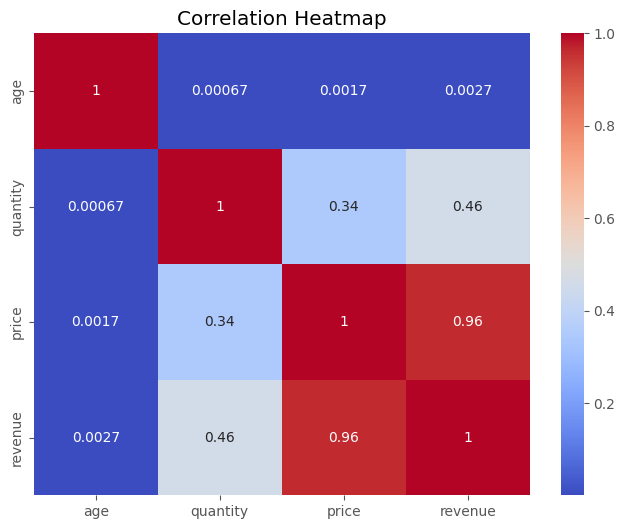

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['age','quantity','price','revenue']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print("=== Automated Insights from Retail Sales Data ===\n")


top_category = df.groupby("category")['revenue'].sum().idxmax()
top_category_value = df.groupby("category")['revenue'].sum().max()
print(f"1️⃣ Top product category by revenue: {top_category} (${top_category_value:,.2f})")

top_mall = df.groupby("shopping_mall")['revenue'].sum().idxmax()
top_mall_value = df.groupby("shopping_mall")['revenue'].sum().max()
print(f"2️⃣ Best performing shopping mall: {top_mall} (${top_mall_value:,.2f})")


gender_sales = df.groupby("gender")['revenue'].sum()
top_gender = gender_sales.idxmax()
print(f"3️⃣ Gender contributing most revenue: {top_gender} (${gender_sales[top_gender]:,.2f})")


avg_age = df['age'].mean()
print(f"4️⃣ Average customer age: {avg_age:.1f} years")


monthly_sales = df.groupby(df['invoice_date'].dt.to_period('M'))['revenue'].sum()
peak_month = monthly_sales.idxmax()
peak_month_value = monthly_sales.max()
print(f"5️⃣ Peak sales month: {peak_month} (${peak_month_value:,.2f})")


corr = df[['age','quantity','price','revenue']].corr()
highest_corr = corr['revenue'].drop('revenue').idxmax()
print(f"6️⃣ Revenue is most correlated with: {highest_corr} (corr={corr['revenue'][highest_corr]:.2f})")

print("\n✅ Insights generated successfully!")


=== Automated Insights from Retail Sales Data ===

1️⃣ Top product category by revenue: Clothing ($113,996,791.04)
2️⃣ Best performing shopping mall: Mall of Istanbul ($50,872,481.68)
3️⃣ Gender contributing most revenue: Female ($150,207,136.02)
4️⃣ Average customer age: 43.4 years
5️⃣ Peak sales month: 2021-07 ($10,311,119.68)
6️⃣ Revenue is most correlated with: price (corr=0.96)

✅ Insights generated successfully!
